<div>
<img src="./img/patreon.PNG" width="600"/>
</div>

# Machine Learning (Introducción)
## Sesión 2

Gabriel Abellán <gabriel.abellan@gmail.com>

En este `notebook` preentaremos algunos términos y técnicas comunes de `machine learning`. Cuando se habla de `Deep Learning`, indicamos un conjunto de herramientas y técnicas de `machine learning` que implican Redes Neuronales Artificiales.

`Machine Learning` es una rama de la inteligencia artificial que desarrolla algoritmos capaces de aprender patrones y reglas utilizando datos. Aunque conceptualmente es una disciplina bien fundamentada ~1950, su reciente uso exahustivo tiene que ver con tres factores:
- Desarrollo en la capacidad de almacenamiento a bajo costo.
- Desarrollo en la capacidad de computo a bajo costo.
- Desarrollo de dispositivos que producen cantidades enormes de datos (telefonos moviles, webs, sensores, etc).

El propósito de este taller es introducir conceptos que (tal vez) son nuevos pero aplicarlos a problemas que (tal vez) ya conocen. De esta manera queremos minimizar el impacto del primer encuentro con el tema y acelerar así la curva de aprendizaje. Una vez familiarizados con la herramienta, se trata de buscar (o crear) nuevos algoritmos e implementarlos dentro del framework.

Los conceptos nuevos tienen que ver con `redes neuronales` y su aplicación; los problemas que trataremos son los viejos y conocidos problemas de `regresión` y `clasificación` (ejemplos de aprendizaje supervisado), así como reducción dimensional haciendo `análisis de componentes principales PCA` (ejemplo de aprendizaje no-supervisado).

## Apredizaje No-Supervisado
### Modelo Lineal - Análisis de Componentes Principales (PCA)

### Reducción Dimensional

Los problemas que nos encontramos al analizar datos poseen generalmente un numero muy grande de factores (a las que tambien se llaman dimensiones). Nuestra intuición es muy pobre ya con problemas 3D, si hay más dimensiones la cosa se complica. Si además están involucrados razonamientos del tipo estadístico, todo empeora; al parecer los seres humanos no estamos cableados para tener intuiciones estadísticas.

Resulta que muchas cosas se comportan de manera poco intuitiva en los espacios de alta dimensionalidad. Por ejemplo, si se elige un punto al azar en un cuadrado unitario (un cuadrado de 1 × 1), solo tendra un 0,4% de posibilidades de estar situado a menos de 0,001 de uno de los bordes (es decir, es muy poco probable que un punto aleatorio sea "extremo" a lo largo de cualquier dimension). Pero en un hipercubo unitario de 10.000 dimensiones, esta probabilidad es superior al 99,999999%. La mayoria de los puntos de un hipercubo de alta dimensionalidad están muy cerca de la frontera.

Otro ejemplo: si se eligen dos puntos al azar en un cuadrado unitario, la distancia media entre estos dos puntos será de aproximadamente 0.52. Si se eligen dos puntos al azar en un cubo unitario (3D), la distancia media será aproximadamente de 0.66. Pero, ¿qué pasa con dos puntos elegidos al azar en un hipercubo de 1.000.000 de dimensiones? La distancia media, aunque no lo creas, sera de 408.25 (aproximadamente $\sqrt{1.000.000/6}$). Esto es altamente contraintuitivo: ¿como pueden estar tan alejados dos puntos cuando ambos se encuentran dentro del mismo hipercubo unitario? Pues bien, hay mucho espacio en altas dimensiones. En consecuencia, los conjuntos de datos de alta dimensión corren el riesgo de ser muy poco densos (sparse): la mayoria de las instancias de entrenamiento probablemente esten muy alejadas unas de otras. Por lo tanto al agregar un nuevo dato es muy probable que este muy lejos de cualquier otro dato. Esto hace que las predicciones al tener data en dimensiones altas sean menos confiables que en dimensiones más bajas (las extrapolaciones deben ser mucho mayores).

> ***Cuantas mas dimensiones tenga el conjunto de entrenamiento, mayor sera el riesgo de `overfitting`.***

Para tratar problemas de este tipo se usan técnicas de reducción dimensional.

Algunos algoritmos de reducción dimensional son:

- Análisis de componentes principales (PCA): determina el hiperplano más cercano a la data y luego proyecta la data.
- Proyecciones aleatorias: proyecion linear aleatoria.
- Escalamiento multidimensional (MDS): reduce la dimensionalidad mientras preserva la distancia entre los puntos en el espacio original.
- Isomap: Genera un grafo conectando cada dato con sus vecinos cercanos, entonces reduce la dimensionalidad preservando estas distancias.
- Incrustación de vecinos estocástica t-distribuida (t-SNE): se calcula una medida de similitud entre pares de datos en el espacio de alta dimensión (Gaussiana) y en el espacio de baja dimensión (t-student o Breit-Wigner). Luego trata de optimizar estas dos medidas de similitud usando una función de costo.
- Analisis discriminante lineal: es un método supervisado de variables cualitativas en el que dos o más clases son conocidas a priori y nuevas observaciones se clasifican en una de ellas en función de sus características. Haciendo uso del teorema de Bayes, LDA estima la probabilidad de que una observacion, dado un determinado valor de los predictores, pertenezca a cada una de las clases de la variable cualitativa.

### Autoencoders

Un `autoencoder` toma las entradas, las convierte en una representacion latente eficiente (de menor dimensionalidad) y luego produce algo que reproduce en alguna medida a la entrada. Un `autoencoder` se compone siempre de dos partes: un `encoder` (o red de reconocimiento) que convierte las entradas en una representacion latente, seguida de un `decoder` (o red generativa) que convierte la representacion interna a las salidas.

<div>
<img src="./img/autoencoder.PNG" width="800"/>
</div>

Los `autoencoder` poseen la misma arquitectura densa que hemos usado en los ejemplos anteriores con la particularidad de que el número de neuronas de salida es igual al número de neuronas de entrada.

Si el autoencoder usa funciones de activación lineales y usamos como función costo el `mean_squared_error`, entonces el algoritmo resultante es el de PCA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Cargamos TensorFlow

In [3]:
import tensorflow.keras as tf
from mpl_toolkits.mplot3d import Axes3D

2022-04-04 00:49:34.767899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-04 00:49:34.767976: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Como vamos a hacer reducción dimensional no estamos interesados en los conjuntos de test (sin embargo nos quedaremos con los labels para hacer comprobaciones).

Trabajaremos con la archiconocida data `MNIST`

In [30]:
(X_train, y_train), (_, _) = tf.datasets.mnist.load_data()

In [31]:
print('Train shape: ', X_train.shape)
print('El valor maximo de un pixel es:', X_train.max())
print('Label shape: ', y_train.shape)
print('Los labels son:', np.unique(y_train))

Train shape:  (60000, 28, 28)
El valor maximo de un pixel es: 255
Label shape:  (60000,)
Los labels son: [0 1 2 3 4 5 6 7 8 9]


Vemos que tenemos 60000 imágenes de 28x28 pixels. Examinamos una de ellas

El label de esta imagen es: 5


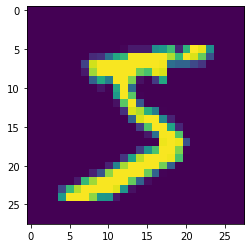

In [32]:
plt.imshow(X_train[0,:,:])
print('El label de esta imagen es:', y_train[0])

Es conveniente normalizar la data

In [33]:
X_train = X_train.astype(np.float32) / 255

### Entrenando la red

Construimos un autoencoder simple, con una única capa oculta (que sera nuestro bottleneck) cuya dimensión es la del espacio reducido que buscamos.

In [34]:
np.random.seed(42)

encoder = tf.models.Sequential([
    tf.layers.Flatten(input_shape=[28, 28]),
    tf.layers.Dense(2)
])
decoder = tf.models.Sequential([
    tf.layers.Dense(28*28, input_shape=[2]),
    tf.layers.Reshape([28, 28])
])

autoencoder = tf.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=tf.optimizers.SGD(learning_rate=1.5))

In [35]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0610
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0569
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0564
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0562
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0561
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560
Epoch 12/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560
E

In [36]:
codings = encoder.predict(X_train)

(60000, 2)


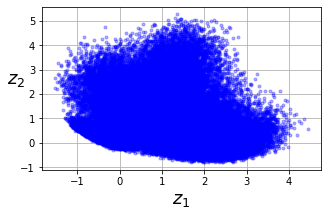

In [37]:
print(codings.shape)

fig = plt.figure(figsize=(5,3))
plt.plot(codings[:,0], codings[:, 1], "b.", alpha=.3)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

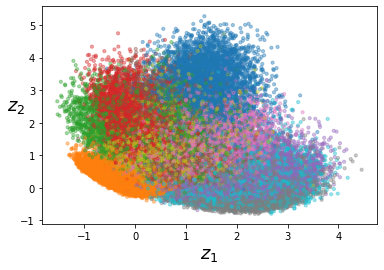

In [38]:
plt.scatter(codings[:, 0], codings[:, 1], c=y_train, s=10, cmap="tab10", alpha=.4)
#plt.legend(['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.axis()
plt.show()

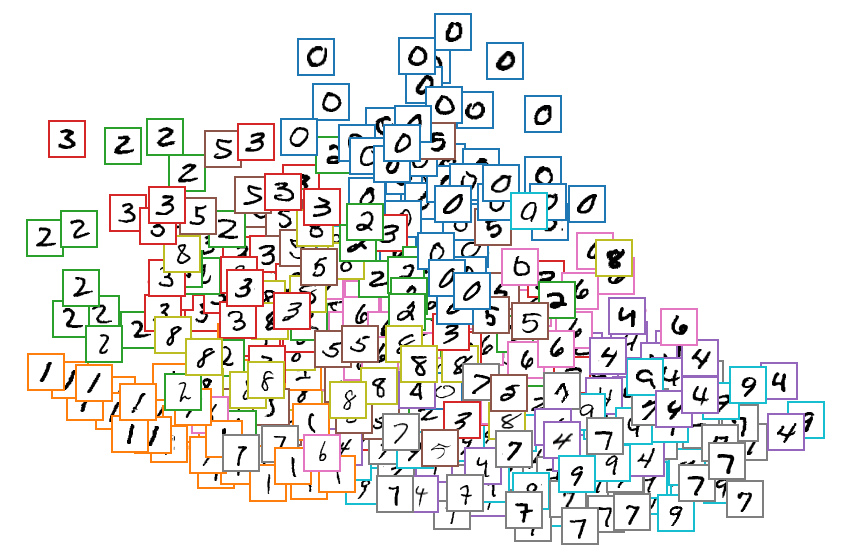

In [39]:
# adaptado de https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

N = 1000 # numero de puntos a graficar

plt.figure(figsize=(15, 10))
cmap = plt.cm.tab10
plt.scatter(codings[:N, 0], codings[:N, 1], c=y_train[:N], s=10, cmap=cmap, alpha=.4)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(codings[:N]):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_train[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
#save_fig()
plt.show()

**Nota que para mostrar estas predicciones usamos la seccion `encoder` del autoencoder.** Esto corresponde a hacer un análisis de componentes principales.

Podemos visualizar algunas de las predicciones para las imágenes (en el espacio original), haciendo `predict` del autoencoder completo.

In [40]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

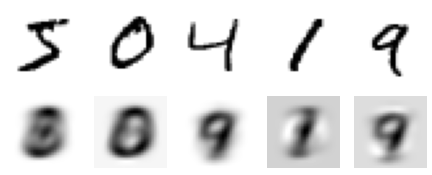

In [41]:
show_reconstructions(autoencoder, X_train)

Como ya habiamos visto no es muy preciso el modelo.

### Visitemos otro ejemplo de clasificacion

Miremos la data archiconocida Fashion MNIST

In [42]:
(X_train_full, y_train_full), (_, _) = tf.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
print('Train shape:', X_train_full.shape)

Train shape: (60000, 28, 28)


In [43]:
np.random.seed(42)

f_encoder = tf.models.Sequential([
    tf.layers.Flatten(input_shape=[28, 28]),
    tf.layers.Dense(2)
])
f_decoder = tf.models.Sequential([
    tf.layers.Dense(28*28,activation="sigmoid", input_shape=[2]), # probar activation="sigmoid"
    tf.layers.Reshape([28, 28])
])

f_autoencoder = tf.models.Sequential([f_encoder, f_decoder])

f_autoencoder.compile(loss="binary_crossentropy",
                   optimizer=tf.optimizers.SGD(learning_rate=1.5), metrics=['binary_accuracy'])

In [44]:
f_history = f_autoencoder.fit(X_train_full, X_train_full, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4341 - binary_accuracy: 0.4836
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4003 - binary_accuracy: 0.4937
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3938 - binary_accuracy: 0.4950
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3901 - binary_accuracy: 0.4951
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3872 - binary_accuracy: 0.4951
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3851 - binary_accuracy: 0.4950
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3834 - binary_accuracy: 0.4951
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3823 - binary_accuracy: 0.4950
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3812 - binary_accuracy: 0.4950
Epoch 10/20
1875/18

veamos qué tan bien reproduce la entrada

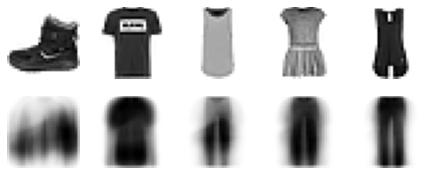

In [45]:
show_reconstructions(f_autoencoder, X_train_full)

In [46]:
f_codings = f_encoder.predict(X_train_full)

Visualicemos el espacio reducido

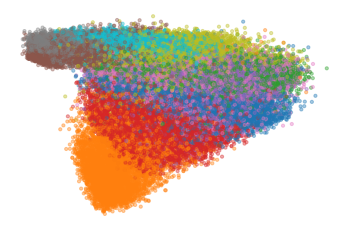

In [47]:
plt.scatter(f_codings[:, 0], f_codings[:, 1], c=y_train_full, s=10, cmap="tab10", alpha=.4)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.axis('off')
plt.show()

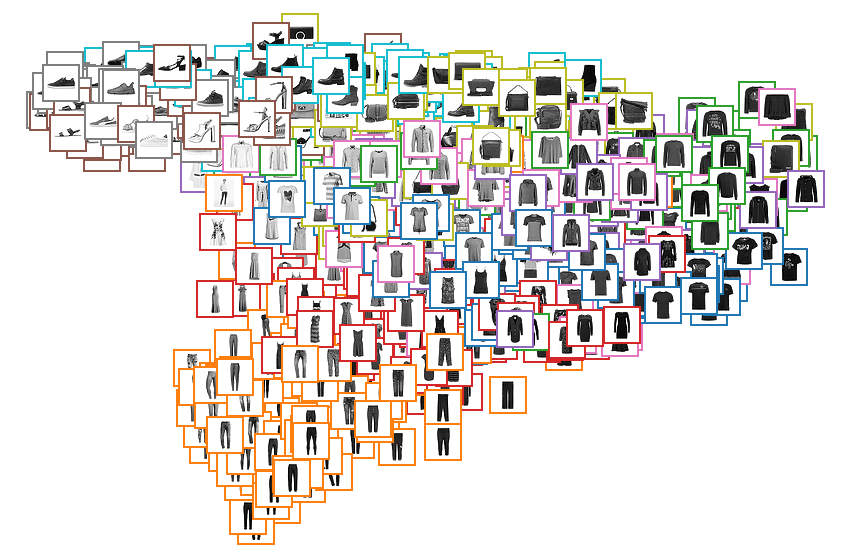

In [48]:
N = 1000 # numero de puntos a graficar

plt.figure(figsize=(15, 10))
cmap = plt.cm.tab10
plt.scatter(f_codings[:N, 0], f_codings[:N, 1], c=y_train_full[:N], s=10, cmap=cmap, alpha=.4)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(f_codings[:N]):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_train_full[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train_full[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
#save_fig()
plt.show()

Para visualizar el espacio reducido probemos el algoritmo `t-SNE`.

In [49]:
from sklearn.manifold import TSNE

In [50]:
np.random.seed(42)

X_compressed = f_encoder.predict(X_train_full)
tsne = TSNE()

In [51]:
X_2D = tsne.fit_transform(X_compressed)
X_2D = (X_2D - X_2D.min()) / (X_2D.max() - X_2D.min())

/opt/tljh/user/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


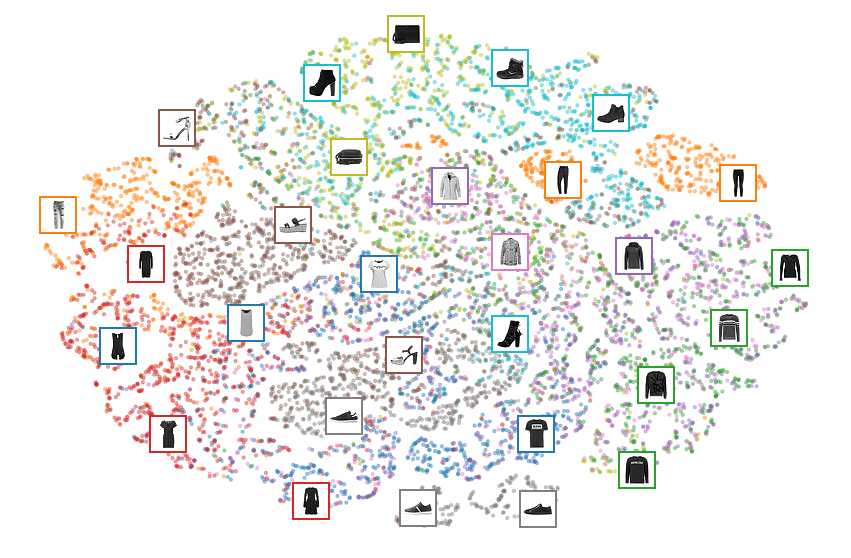

In [52]:
N = 10000 # numero de puntos a graficar

plt.figure(figsize=(15, 10))
cmap = plt.cm.tab10
plt.scatter(X_2D[:N, 0], X_2D[:N, 1], c=y_train_full[:N], s=10, cmap=cmap, alpha=.4)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_2D[:N]):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_train_full[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train_full[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
#save_fig()
plt.show()

### Ejercicio

Trabajaremos con la data Fashion MNIST.
- Cargar la data.
- Explorar la data. Plotear algunas de las imágenes. Ver los labels.
- Dividir la data en conjunto `train` y `test`.
- Probar algún método de normalización de la data (reescalar, MinMax o algún otro).
- Construir un autoencoder con capas ocultas.
    - Pruebe incorporar una capa oculta (recuerde que es una oculta en el `encoder` y otra en el `decoder`).
    - Elija el número de neuronas.
    - Elija la función de activación.
    - Use un `bottleneck` con entre 30 a 50 neuronas.
    - Recuerde que los `encoder` y `decoder` son espejos uno del otro en cuanto al número de neuronas.
    - Elija la función de costo (loss), el optimizer y la métrica.
    - Compile el modelo y haga el fit.
- Juegue un rato con los pasos anteriores cambiando parámetros (número de neuronas de la capa oculta y el `bottleneck`, funciones de activación, loss)
- Puede incorporar dos capas ocultas y repetir el proceso de experimentación (hay formas más organizadas y automatizadas de hacer esto pero por ahora es suficiente con hacerlo tanteando).
- Verifique sus predicciones graficando la salida del autoencoder para algunas de las imágenes.
- Una vez que tenga un modelo razonable, use la libreria `sklearn` para aplicar `t-SNE` al encoder y poder graficar las imágenes como puntos 2D (esto puede tomar tiempo).
- Construya una función que empaquete el codigo que grafica en 2D y superpone la foto con las etiquetas.
- Haga el gráfico de la data en el espacio reducido.
- Escriba una pequeña conclusión.

Hemos usado los recursos mas elementales de redes neurales, queda todo un universo a explorar pero cada pequeño paso permite resolver nuevos problemas. Sigue adelante!